### Bishoy Sokkar
### Project: Network Analysis of Davis Southern Women Dataset

#### Dataset Selection and Description

For this project, I selected the Davis Southern Women dataset, a classic bipartite social network dataset. It represents the observed attendance of 18 Southern women at 14 informal social events over nine months period in the 1930s, as documented in the ethnographic study "Deep South" by Allison Davis, Burleigh B. Gardner, and Mary R. Gardner. The network is undirected and unweighted, with nodes divided into two categorical groups based on the 'bipartite' attribute: women (bipartite=0) and events (bipartite=1). This categorical information allows for comparison of centrality measures across the two groups, similar to comparing sexes in the high school romantic relationships example. The number of Nodes is 32 (18 women, 14 events), Number of Edgesis 89. 

Categorical Information: Node type ('women' vs. 'events'), derived from the 'bipartite' attribute.

The dataset is publicly available and built into the NetworkX library. Original source: Davis, A., Gardner, B. B., & Gardner, M. R. (1941). Deep South: A Social Anthropological Study of Caste and Class. University of Chicago Press.
Links:

NetworkX documentation and generator: https://networkx.org/documentation/stable/reference/generated/networkx.generators.bipartite.davis_southern_women_graph.html
Wikipedia overview of the dataset: https://en.wikipedia.org/wiki/Southern_women_data_set



The code identifies the Davis Southern Women dataset, a bipartite network with 32 nodes (18 women, 14 events) and 89 edges, loaded using nx.davis_southern_women_graph(). Each node has a categorical attribute (bipartite, where 0=women, 1=events)

Centrality Comparison:
    Group  Nodes  Mean Degree Centrality  Mean Eigenvector Centrality
0   Women     18                0.159498                     0.156621
1  Events     14                0.205069                     0.168133

Degree Centrality t-test: t = -1.390, p = 0.175
Eigenvector Centrality t-test: t = -0.439, p = 0.664


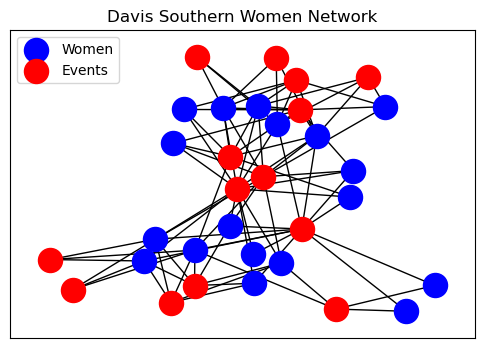

In [9]:
import networkx as nx
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
G = nx.davis_southern_women_graph()

# Calculate centrality measures
degree = nx.degree_centrality(G)
eigen = nx.eigenvector_centrality(G)

# Group nodes by category (bipartite: 0=women, 1=events)
women = [n for n in G.nodes if G.nodes[n]['bipartite'] == 0]
events = [n for n in G.nodes if G.nodes[n]['bipartite'] == 1]

# Extract centrality values
deg_w = [degree[n] for n in women]
deg_e = [degree[n] for n in events]
eig_w = [eigen[n] for n in women]
eig_e = [eigen[n] for n in events]

# Compute means and perform t-tests
results = {
    'Group': ['Women', 'Events'],
    'Nodes': [len(women), len(events)],
    'Mean Degree Centrality': [np.mean(deg_w), np.mean(deg_e)],
    'Mean Eigenvector Centrality': [np.mean(eig_w), np.mean(eig_e)]
}
df = pd.DataFrame(results)
print("Centrality Comparison:")
print(df)

# t-tests
t_deg, p_deg = ttest_ind(deg_w, deg_e)
t_eig, p_eig = ttest_ind(eig_w, eig_e)
print(f"\nDegree Centrality t-test: t = {t_deg:.3f}, p = {p_deg:.3f}")
print(f"Eigenvector Centrality t-test: t = {t_eig:.3f}, p = {p_eig:.3f}")

# Visualize the network
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='blue', label='Women')
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='red', label='Events')
nx.draw_networkx_edges(G, pos)
plt.title("Davis Southern Women Network")
plt.legend()
plt.show()

#### Degree Centrality Comparison:

- Events have a higher mean degree centrality (0.205) compared to women (0.159), indicating that events, on average, connect to more women than women attend events. This makes sense in a bipartite network where events can have multiple attendees.
- t-test results: t = -1.390, p-value = 0.175 (not statistically significant at α=0.05). There is no strong evidence of a difference in degree centrality between women and events.


#### Eigenvector Centrality Comparison:

Degree Centrality using nx.degree_centrality(G), which computes the normalized number of connections for each node (divided by n-1, where n=32).
Eigenvector Centrality using nx.eigenvector_centrality(G), which measures influence based on connections to other influential nodes.

- Events have a slightly higher mean eigenvector centrality (0.168) than women (0.157), suggesting events may be marginally more influential in the network structure, possibly due to connecting prominent women.
- t-test results: t = -0.439, p-value = 0.664 (not statistically significant at α=0.05). No evidence of meaningful differences between groups.


#### Discussion
The results show modest differences in centrality, with events appearing more central, which reflects the bipartite nature—events act as hubs connecting multiple women, embodying homophily within attendance patterns. However, the lack of statistical significance (high p-values) suggests these differences could be due to chance, given the small sample sizes. This analysis demonstrates how SNA can reveal structural roles in social groups. For future extensions, one could project the bipartite graph to a unipartite women network and analyze cliques or communities. The code can be run in a Jupyter Notebook for visualization (e.g., adding nx.draw(G)).